In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
def load_dataset():
    """ Reads dataset csv and returns pandas dataframe """
    
    filepath = "Pitchers_Adjusted_Salary.csv"

    df = pd.read_csv(filepath, encoding="utf-8", low_memory=False)
    
    return df

In [3]:
def clean_dataset(a_df):
    """ Returns deduped, na-dropped, index-reset dataframe """    
    
    a_df = a_df.drop_duplicates()   
        
    a_df = a_df.dropna()
    
    a_df = a_df.drop(["Unnamed: 0", "teamID", "lgID", "salary", "PO", "A", "E", "DP"], axis=1)
        
    a_df = a_df.reset_index(drop=True)
    
    return a_df   

In [4]:
def rename_columns(a_df):
    """ Returns dataframe with meaningful column names """    
    
    abbr_dict = {"GS": "games_started", "InnOuts": "inning_outs", "G": "games_played", "AB": "at_bats",\
                "R": "runs", "H": "hits", "2B": "doubles", "3B": "triples", "HR": "home_runs",\
                "RBI": "runs_batted_in", "SB": "stolen_bases", "CS": "caught_stealing", "BB": "base_on_balls",\
                "SO": "strike_outs", "IBB": "intentional_walks", "HBP": "hit_by_pitch", "SH": "sacrifice_hits",\
                "SF": "sacrifice_flies", "GIDP": "ground_into_double_play"}
    
    a_df = a_df.rename(columns=abbr_dict)
    
    return a_df   

In [5]:
def examine_dataset(a_df):
    """ Provides summary info and visualizations of dataset """
    
    print(a_df.info())
           
    print(f'\n\nADJ SALARY VALUE COUNTS: \n {a_df["ADJ Salary"].value_counts()}\n\n')
    
    a_df.hist(figsize = (15, 15))  
    
    sns.PairGrid(a_df[["runs", "runs_batted_in", "strike_outs", "hits", "at_bats"]]).map_upper(plt.scatter) # just scatter plot the float values

In [6]:
def scale_dataset(a_df):
    """ Returns dataframe with target column removed, data scaled with standard scaler, data normalized, and labels """
    
    salary_labels = a_df["ADJ Salary"]    
    no_target_df = a_df.drop(columns=["ADJ Salary"])
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(no_target_df)    
    print(f"SHAPE AFTER SCALING: {scaled_data.shape}")

    normalized_data = normalize(no_target_df)    
    print(f"SHAPE AFTER NORMALIZING: {normalized_data.shape}")

    return no_target_df, scaled_data, normalized_data, salary_labels

In [8]:
loaded_df = load_dataset()

In [9]:
loaded_df

,Unnamed: 0,yearID,playerID,salary,ADJ Salary,InnOuts,PO,A,E,DP,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,0,1985,barkele01,870000,2.092617e+06,221.0,2,9,1.0,0,ATL,NL,2,9,20,18,0,0,0,221,84,52,10,37,47,0.288,6.35,1.0,3,1.0,0,335.0,1,55,4.0,1.0,4.0
1,1,1985,bedrost01,550000,1.322919e+06,620.0,13,23,4.0,3,ATL,NL,7,15,37,37,0,0,0,620,198,88,17,111,134,0.254,3.83,6.0,6,5.0,0,907.0,0,101,6.0,7.0,17.0
2,2,1985,campri01,633333,1.523360e+06,383.0,7,13,4.0,3,ATL,NL,4,6,66,2,0,0,3,383,130,56,8,61,49,0.263,3.95,11.0,4,5.0,0,569.0,23,72,4.0,4.0,24.0
3,3,1985,dedmoje01,150000,3.607960e+05,258.0,9,27,2.0,4,ATL,NL,6,3,60,0,0,0,0,258,84,39,5,49,41,0.264,4.08,14.0,2,1.0,1,377.0,15,52,8.0,1.0,17.0
4,4,1985,forstte01,483333,1.162564e+06,178.0,2,7,1.0,0,ATL,NL,2,3,46,0,0,0,1,178,49,15,7,28,37,0.222,2.28,4.0,1,0.0,0,253.0,19,22,2.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16110,16110,2016,roarkta01,543400,5.859741e+05,630.0,9,36,1.0,5,WAS,NL,16,10,34,33,0,0,0,630,173,66,17,73,172,0.228,2.83,4.0,6,13.0,1,855.0,0,72,10.0,1.0,28.0
16111,16111,2016,rossjo01,514400,5.547021e+05,315.0,4,13,1.0,0,WAS,NL,7,5,19,19,0,0,0,315,108,40,9,29,93,0.269,3.43,3.0,2,6.0,0,447.0,0,43,7.0,3.0,10.0
16112,16112,2016,scherma01,22142857,2.387770e+07,685.0,12,19,1.0,1,WAS,NL,20,7,34,34,1,0,0,685,165,75,31,56,284,0.199,2.96,2.0,2,6.0,1,902.0,0,77,7.0,3.0,6.0
16113,16113,2016,strasst01,10400000,1.121482e+07,443.0,8,9,1.0,1,WAS,NL,15,4,24,24,0,0,0,443,119,59,15,44,183,0.218,3.60,1.0,2,2.0,0,598.0,0,59,5.0,1.0,7.0


In [10]:
clean_df = clean_dataset(loaded_df)

In [11]:
clean_df = rename_columns(clean_df)

In [12]:
clean_df.head(10)

,yearID,playerID,ADJ Salary,inning_outs,W,L,games_played,games_started,CG,SHO,SV,IPouts,hits,ER,home_runs,base_on_balls,strike_outs,BAOpp,ERA,intentional_walks,WP,hit_by_pitch,BK,BFP,GF,runs,sacrifice_hits,sacrifice_flies,ground_into_double_play
0,1985,barkele01,2.092617e+06,221.0,2,9,20,18,0,0,0,221,84,52,10,37,47,0.288,6.35,1.0,3,1.0,0,335.0,1,55,4.0,1.0,4.0
1,1985,bedrost01,1.322919e+06,620.0,7,15,37,37,0,0,0,620,198,88,17,111,134,0.254,3.83,6.0,6,5.0,0,907.0,0,101,6.0,7.0,17.0
2,1985,campri01,1.523360e+06,383.0,4,6,66,2,0,0,3,383,130,56,8,61,49,0.263,3.95,11.0,4,5.0,0,569.0,23,72,4.0,4.0,24.0
3,1985,dedmoje01,3.607960e+05,258.0,6,3,60,0,0,0,0,258,84,39,5,49,41,0.264,4.08,14.0,2,1.0,1,377.0,15,52,8.0,1.0,17.0
4,1985,forstte01,1.162564e+06,178.0,2,3,46,0,0,0,1,178,49,15,7,28,37,0.222,2.28,4.0,1,0.0,0,253.0,19,22,2.0,2.0,7.0
5,1985,garbege01,1.856897e+06,292.0,6,6,59,0,0,0,1,292,98,39,8,25,66,0.264,3.61,8.0,1,2.0,0,409.0,31,41,9.0,1.0,9.0
6,1985,mahleri01,9.801625e+05,800.0,17,15,39,39,6,1,0,800,272,103,24,79,107,0.268,3.48,8.0,3,2.0,1,1110.0,0,116,10.0,5.0,32.0
7,1985,mcmurcr01,6.614593e+05,135.0,0,3,17,6,0,0,1,135,56,33,6,27,28,0.306,6.60,1.0,3,1.0,0,220.0,3,36,7.0,2.0,2.0
8,1985,perezpa01,1.082388e+06,286.0,1,13,22,22,0,0,0,286,115,65,10,57,57,0.297,6.14,10.0,2,1.0,2,453.0,0,72,5.0,3.0,6.0
9,1985,suttebr01,3.257187e+06,265.0,7,7,58,0,0,0,23,265,91,44,13,29,52,0.267,4.48,4.0,0,3.0,0,382.0,50,46,7.0,2.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16115 entries, 0 to 16114
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   yearID                   16115 non-null  int64  
 1   playerID                 16115 non-null  object 
 2   ADJ Salary               16115 non-null  float64
 3   inning_outs              16115 non-null  float64
 4   W                        16115 non-null  int64  
 5   L                        16115 non-null  int64  
 6   games_played             16115 non-null  int64  
 7   games_started            16115 non-null  int64  
 8   CG                       16115 non-null  int64  
 9   SHO                      16115 non-null  int64  
 10  SV                       16115 non-null  int64  
 11  IPouts                   16115 non-null  int64  
 12  hits                     16115 non-null  int64  
 13  ER                       16115 non-null  int64  
 14  home_runs             

KeyError: "['runs_batted_in', 'at_bats'] not in index"

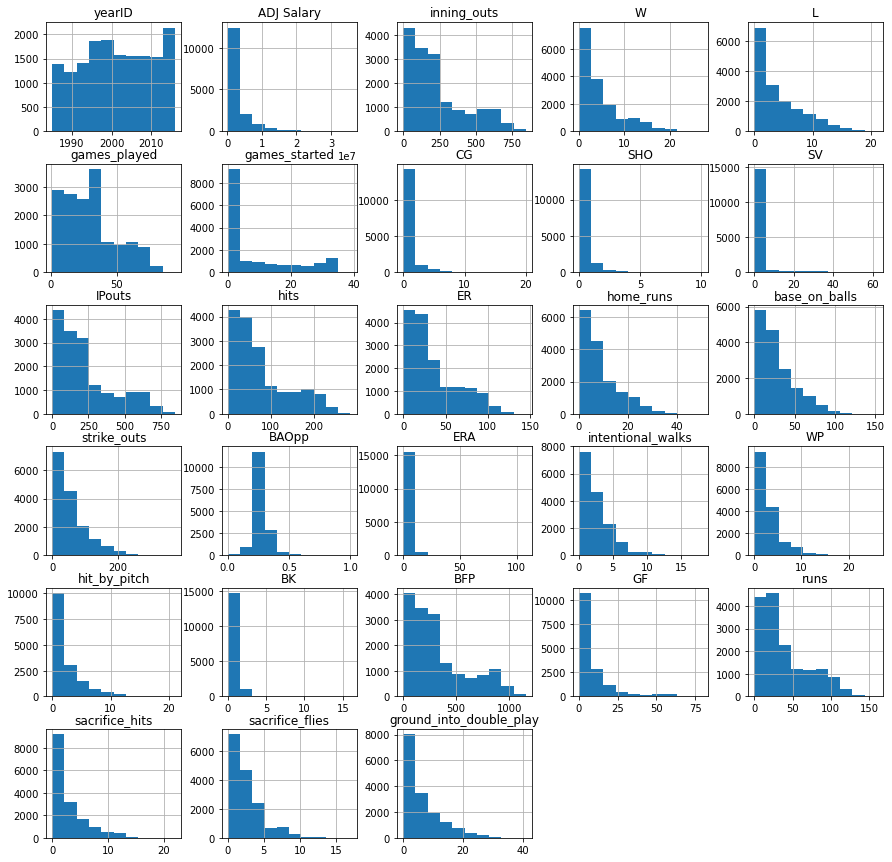

In [13]:
examine_dataset(clean_df)

In [ ]:
year_player_group = clean_df.groupby(["yearID", "playerID"])

In [ ]:
clean_df["ADJ Salary"] = clean_df["ADJ Salary"].astype("int").round()

In [ ]:
clean_df["ADJ Salary"]

In [ ]:
year_player_group(["ADJ Salary"]).mean()

In [ ]:
examine_dataset(clean_df)

In [ ]:
# Assign X and y

X = df.drop(["ADJ Salary"], axis=1)
y = df["ADJ Salary"]

In [ ]:
# Split the data into X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Create a scaler to standardize the data

scaler = StandardScaler()

# Train the scaler with the X_train data.

scaler.fit(X_train)

In [ ]:
# Transform X_train and X_test.

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression().fit(X_train_scaled, y_train)

In [ ]:
# Score the model

print(f"Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}")